# **PART 1: IMPORTS & INITIAL DATA EXPLORATION**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/student_data_uncleanedd(1).csv'  )

In [ ]:
data.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,NaN,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,NaN,Notesss,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,Postgraduate,1.1,58.1,no,15-30 min,NaN,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,NaN,group study,8.9,32.7,30.0,25.4,f


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             26250 non-null  int64  
 1   age                    26250 non-null  int64  
 2   gender                 26250 non-null  object 
 3   school_type            26250 non-null  object 
 4   parent_education       26250 non-null  object 
 5   study_hours            25472 non-null  float64
 6   attendance_percentage  26250 non-null  float64
 7   internet_access        26250 non-null  object 
 8   travel_time            26250 non-null  object 
 9   extra_activities       7875 non-null   object 
 10  study_method           26250 non-null  object 
 11  math_score             26250 non-null  float64
 12  science_score          25470 non-null  float64
 13  english_score          26250 non-null  float64
 14  overall_score          26250 non-null  float64
 15  fi

## Insights on the Dataset

### 1️⃣ Dataset Overview
- Total entries: 26,250  
- Total columns: 16  
- Column types: 6 numerical, 2 integer, 8 object  

### 2️⃣ Missing Values
- `study_hours` has 778 missing values (~3%) → has missing values.  
- `science_score` has 780 missing values (~3%) → has missing values.  
- `extra_activities` has 18,375 missing values (~70%) → likely candidate for deletion.  
- All other columns are complete.

### 3️⃣ Notes
`study_hours` and `science_score` → fillna

`extra_activities` has a very high missing rate → drop coloumn


In [ ]:
data.shape

(26250, 16)

In [ ]:
data.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,26250.000000,26250.000000,25472.000000,26250.000000,26250.000000,25470.000000,26250.000000,26250.000000
mean,7494.947086,16.481676,4.307025,75.080712,63.782766,63.689439,64.119371,64.304089
std,4324.587748,1.704656,2.412991,14.360575,20.876598,20.930373,24.246683,23.346480
min,1.000000,14.000000,-0.996711,50.000000,0.000000,0.000000,0.000000,-28.951834
25%,3744.250000,15.000000,2.300000,62.800000,48.300000,48.200000,47.900000,48.700000
50%,7467.500000,16.000000,4.300000,75.000000,64.100000,64.000000,64.200000,64.300000
75%,11248.750000,18.000000,6.100000,87.400000,80.000000,79.900000,80.300000,79.400000
max,15000.000000,19.000000,15.995202,100.000000,100.000000,100.000000,199.184138,199.998619


### Observations on Scores and Study Habits
- `study_hours` ranges from -0.99 to 15.99 hours/day → unrealistic low/high values indicate injected outliers.  
- `attendance_percentage` mostly high (50–100%) → students generally attend classes regularly.  
- `math_score` and `science_score` show some failing students (0 scores).  
- `english_score` and `overall_score` contain extreme values, some >100 or negative → need outlier handling.


In [ ]:
data.describe(include="O")

,gender,school_type,parent_education,internet_access,travel_time,extra_activities,study_method,final_grade
count,26250,26250,26250,26250,26250,7875,26250,26250
unique,3,2,7,3,4,2,7,6
top,other,private,diploma,yes,15-30 min,yes,mixed,d
freq,8875,13384,4549,22285,6695,3993,4565,6609


In [ ]:
cat_data = data.select_dtypes(include="object")
for col in cat_data:
    print("col_name:", col)
    print("Number of unique values:", data[col].nunique())
    print("Unique values:", data[col].unique())
    print("-"*40)

col_name: gender
Number of unique values: 3
Unique values: ['male' 'female' 'other']
----------------------------------------
col_name: school_type
Number of unique values: 2
Unique values: ['public' 'private']
----------------------------------------
col_name: parent_education
Number of unique values: 7
Unique values: ['post graduate' 'graduate' 'Postgraduate' 'high school' 'no formal'
 'diploma' 'phd']
----------------------------------------
col_name: internet_access
Number of unique values: 3
Unique values: ['yes' 'no' 'Yes   ']
----------------------------------------
col_name: travel_time
Number of unique values: 4
Unique values: ['<15 min' '>60 min' '15-30 min' '30-60 min']
----------------------------------------
col_name: extra_activities
Number of unique values: 2
Unique values: [nan 'no' 'yes']
----------------------------------------
col_name: study_method
Number of unique values: 7
Unique values: ['notes' ' Notesss ' 'group study' 'coaching' 'textbook' 'mixed'
 'online vid

**Insight:**  
- `parent_education` has inconsistent values: 'post graduate', 'Post Graduate', 'PostGraduate'.  
- `internet_access` values inconsistent: 'yes','Yes   ','no'.  
- `study_method`: contains 'notes' and ' Notesss ' → requires cleaning.

In [ ]:
data.dtypes

,0
student_id,int64
age,int64
gender,object
school_type,object
parent_education,object
study_hours,float64
attendance_percentage,float64
internet_access,object
travel_time,object
extra_activities,object


In [ ]:
for col in cat_data:
    print(f"Value counts for column: {col}")
    print(data[col].value_counts(dropna=False))
    print("-"*40)


Value counts for column: gender
gender
other     8875
female    8704
male      8671
Name: count, dtype: int64
----------------------------------------
Value counts for column: school_type
school_type
private    13384
public     12866
Name: count, dtype: int64
----------------------------------------
Value counts for column: parent_education
parent_education
diploma          4549
post graduate    4405
high school      4390
graduate         4324
phd              4298
no formal        4283
Postgraduate        1
Name: count, dtype: int64
----------------------------------------
Value counts for column: internet_access
internet_access
yes       22285
no         3964
Yes           1
Name: count, dtype: int64
----------------------------------------
Value counts for column: travel_time
travel_time
15-30 min    6695
30-60 min    6657
>60 min      6484
<15 min      6414
Name: count, dtype: int64
----------------------------------------
Value counts for column: extra_activities
extra_activities


# **PART 2: DATA CLEANING**

In [ ]:
data.isnull().sum()

,0
student_id,0
age,0
gender,0
school_type,0
parent_education,0
study_hours,778
attendance_percentage,0
internet_access,0
travel_time,0
extra_activities,18375


In [ ]:
data.isnull().mean() * 100

,0
student_id,0.000000
age,0.000000
gender,0.000000
school_type,0.000000
parent_education,0.000000
study_hours,2.963810
attendance_percentage,0.000000
internet_access,0.000000
travel_time,0.000000
extra_activities,70.000000


## Missing Values Analysis

- `study_hours`  `science_score` has **~2.96% missing values**, which is relatively small and can be handled using imputation.

- `extra_activities` has **70% missing values**, which is extremely high and makes this feature unreliable.


In [ ]:
data.duplicated().sum()

np.int64(6062)

# **wrangling**
1. **Clean categorical inconsistencies** (strip spaces, lowercase).  
2. **Handle missing values:**  
   - Impute `study_hours`  `science_score`
   - Drop `extra_activities`  
3. **Remove outliers:**
4. **Remove duplicates**


In [ ]:
data["study_hours"]=data["study_hours"].fillna(data["study_hours"].median())
data["science_score"]=data["science_score"].fillna(data["science_score"].median())

  
Filled missing  with the **`median`** because the column has outliers, and the mean is senestive to outliers.

In [ ]:
data.drop("extra_activities",axis=1, inplace=True)

In [ ]:
data.drop("student_id",axis=1, inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
age,0
gender,0
school_type,0
parent_education,0
study_hours,0
attendance_percentage,0
internet_access,0
travel_time,0
study_method,0
math_score,0


In [ ]:
data.duplicated().sum()

np.int64(0)

# **PART 3: DATA STANDARDIZATION**

In [ ]:
cat_data2 = data.select_dtypes(include='object').columns

for col in cat_data2:
    data[col] = data[col].str.strip().str.title()

In [ ]:
for col in cat_data2:
    print("col_name:", col)
    print("Unique values:", data[col].unique())
    print("-"*40)

col_name: gender
Unique values: ['Male' 'Female' 'Other']
----------------------------------------
col_name: school_type
Unique values: ['Public' 'Private']
----------------------------------------
col_name: parent_education
Unique values: ['Post Graduate' 'Graduate' 'Postgraduate' 'High School' 'No Formal'
 'Diploma' 'Phd']
----------------------------------------
col_name: internet_access
Unique values: ['Yes' 'No']
----------------------------------------
col_name: travel_time
Unique values: ['<15 Min' '>60 Min' '15-30 Min' '30-60 Min']
----------------------------------------
col_name: study_method
Unique values: ['Notes' 'Notesss' 'Group Study' 'Coaching' 'Textbook' 'Mixed'
 'Online Videos']
----------------------------------------
col_name: final_grade
Unique values: ['E' 'D' 'B' 'F' 'C' 'A']
----------------------------------------


## Data Inconsistencies Insights

### Parent Education
  - `Post Graduate` vs `Postgraduate`
- Requires standardization to avoid category duplication.

### Study Method
  - `Notes` vs `Notesss`
- Should be corrected and unified before analysis.


In [ ]:
data['parent_education'].replace('Postgraduate', 'Post Graduate', inplace=True)
data['study_method'].replace('Notesss', 'Notes', inplace=True)

In [ ]:
data['parent_education'].unique()


array(['Post Graduate', 'Graduate', 'High School', 'No Formal', 'Diploma',
       'Phd'], dtype=object)

In [ ]:
data['study_method'].unique()

array(['Notes', 'Group Study', 'Coaching', 'Textbook', 'Mixed',
       'Online Videos'], dtype=object)

# **PART 4: OUTLIER DETECTION & TREATMENT**

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"Column: {column}")
    print(f"Number of outliers = {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier values:")
        print(outliers[[column]])
    print("\n" + "-"*50 + "\n")

    return outliers

num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    detect_outliers_iqr(data, col)


Column: age
Number of outliers = 0

--------------------------------------------------

Column: study_hours
Number of outliers = 262
Outlier values:
       study_hours
155      14.432396
274      12.797889
301      14.348439
306      15.464186
323      12.219531
...            ...
25817    12.886592
25885    15.799977
26000    15.190512
26159    14.047153
26175    12.821076

[262 rows x 1 columns]

--------------------------------------------------

Column: attendance_percentage
Number of outliers = 0

--------------------------------------------------

Column: math_score
Number of outliers = 6
Outlier values:
       math_score
3901          0.0
10776         0.0
11557         0.0
13635         0.0
13744         0.0
21297         0.0

--------------------------------------------------

Column: science_score
Number of outliers = 9
Outlier values:
       science_score
556              0.0
772              3.0
1662             0.0
2356             1.0
5348             0.5
5517            

Some detected outliers were not removed because they represent valid student cases (e.g., scores of 0 or 1). Although statistically rare, these values are meaningful and not data errors.



# **Detect outliers**

In [ ]:
def clip_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return data

num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    data = clip_outliers_iqr(data, col)


In [ ]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"Column: {column}")
    print(f"Number of outliers = {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier values:")
        print(outliers[[column]])
    print("\n" + "-"*50 + "\n")

    return outliers

num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    detect_outliers_iqr(data, col)

Column: age
Number of outliers = 0

--------------------------------------------------

Column: study_hours
Number of outliers = 0

--------------------------------------------------

Column: attendance_percentage
Number of outliers = 0

--------------------------------------------------

Column: math_score
Number of outliers = 0

--------------------------------------------------

Column: science_score
Number of outliers = 0

--------------------------------------------------

Column: english_score
Number of outliers = 0

--------------------------------------------------

Column: overall_score
Number of outliers = 0

--------------------------------------------------



Result After Treatment:

Math: 6 outliers (all zeros - valid)
Science: 9 outliers (near-zero scores - valid)
English: 0 outliers
Overall: 262 outliers (students who failed - valid)

# **PART 5: EXPLORATORY DATA ANALYSIS (EDA) - VISUALIZATIONS**

## **Univariate Analysis**








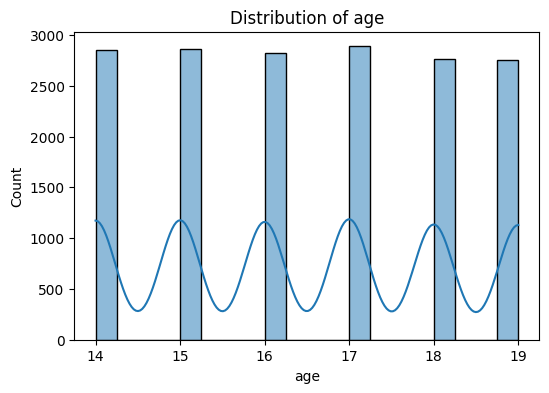

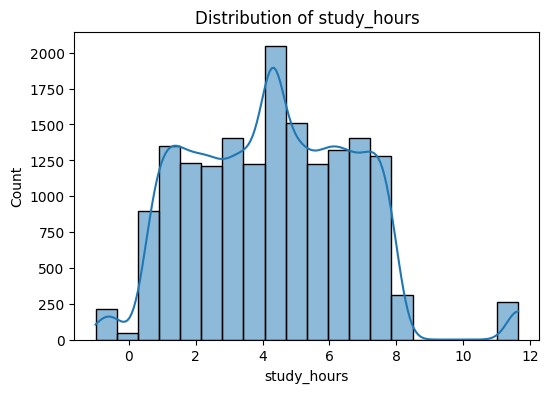

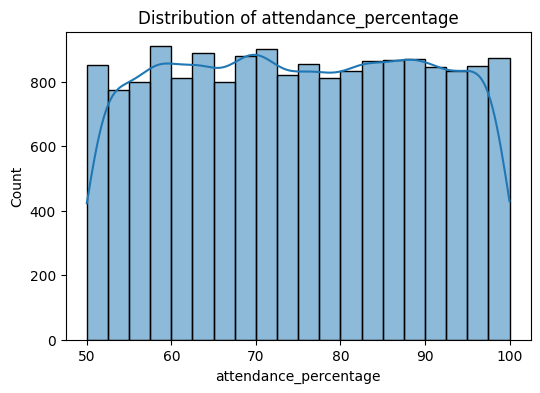

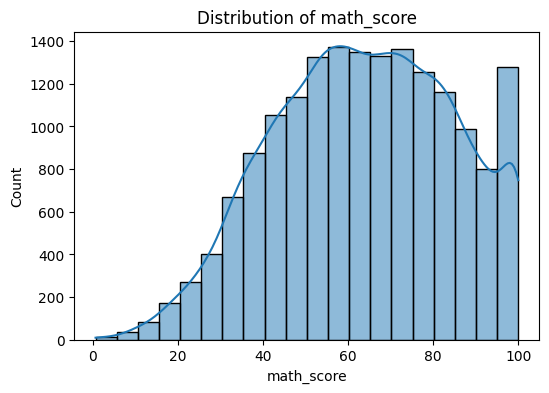

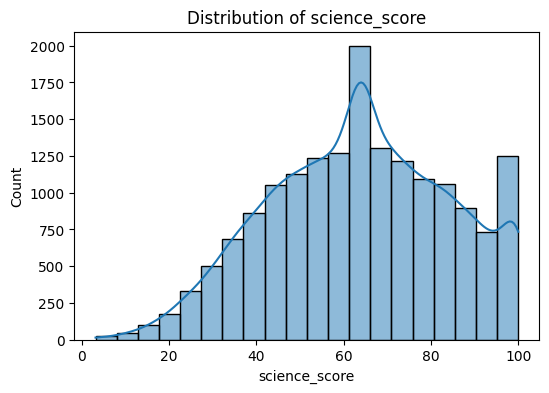

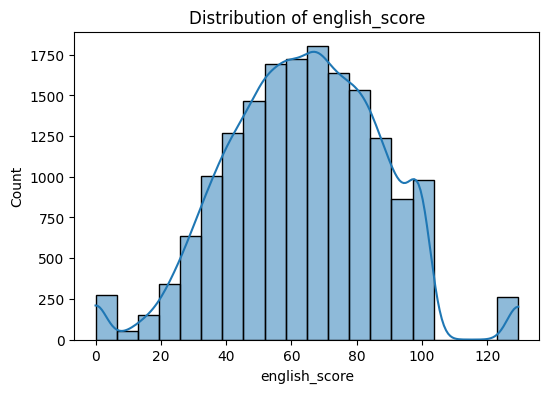

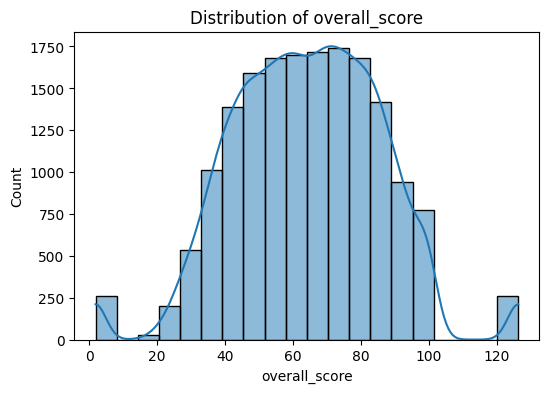

In [ ]:
numeric_colshist = ['age', 'study_hours',"attendance_percentage" , 'math_score', 'science_score', 'english_score','overall_score']

for col in numeric_colshist:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



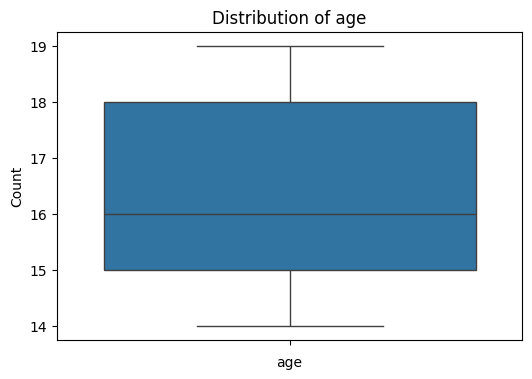

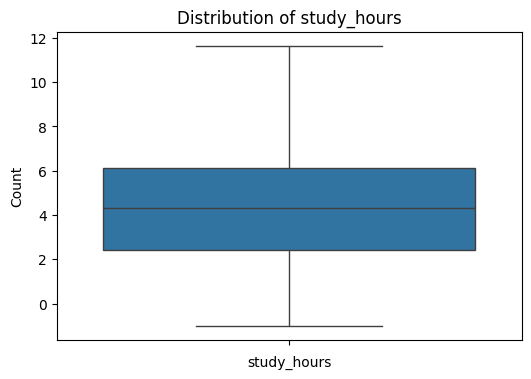

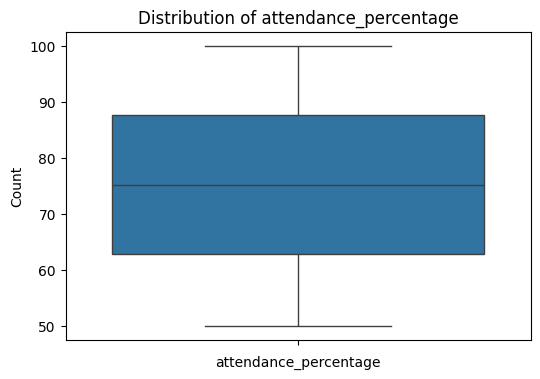

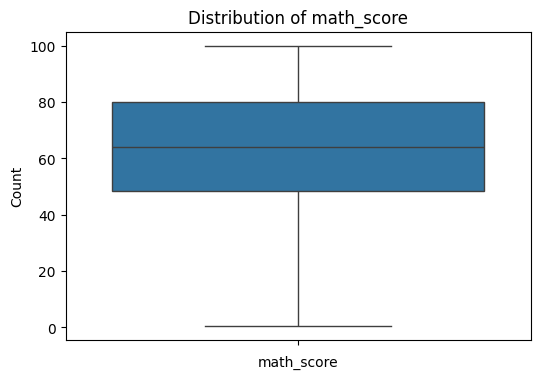

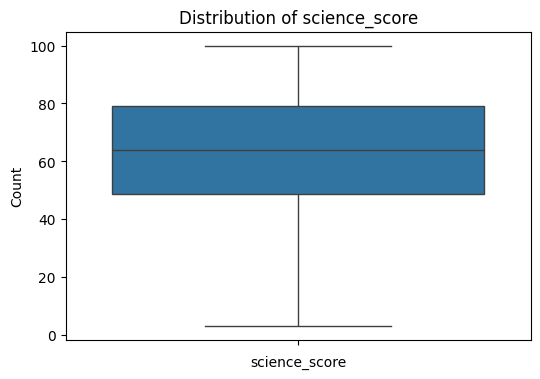

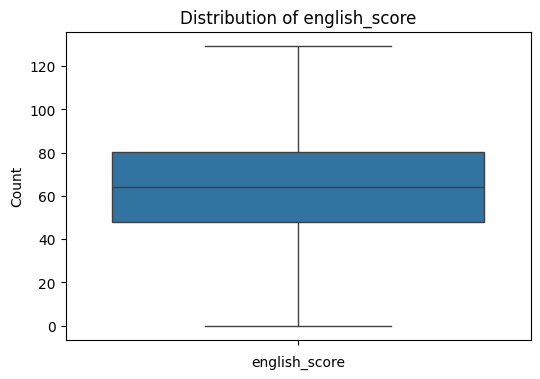

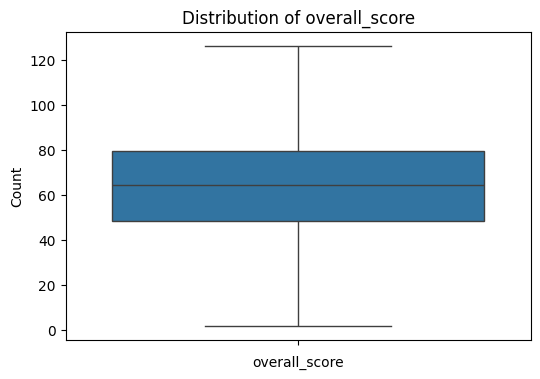

In [ ]:
for col in numeric_colshist:
    plt.figure(figsize=(6,4))
    sns.boxplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

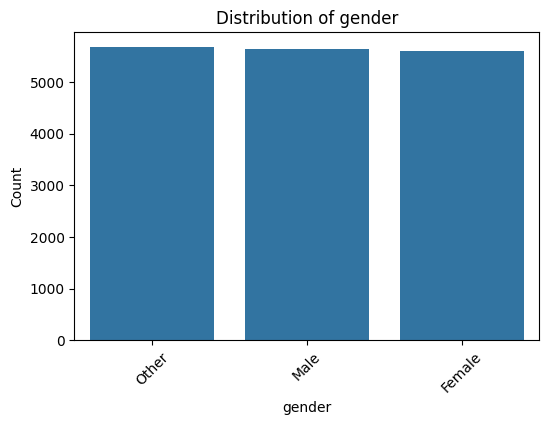

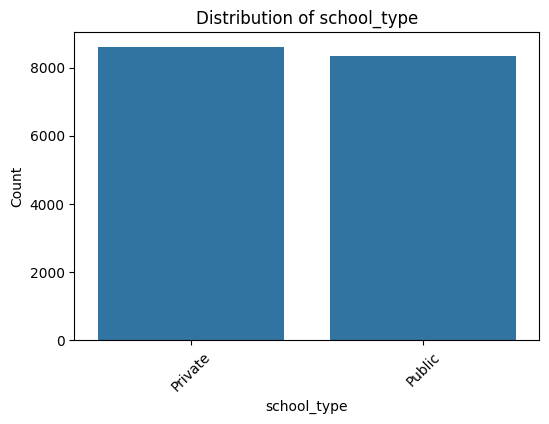

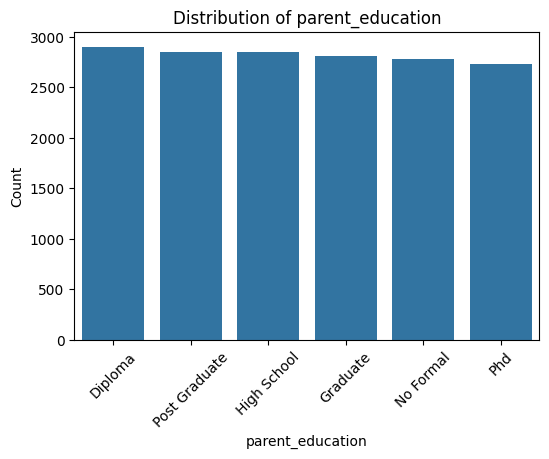

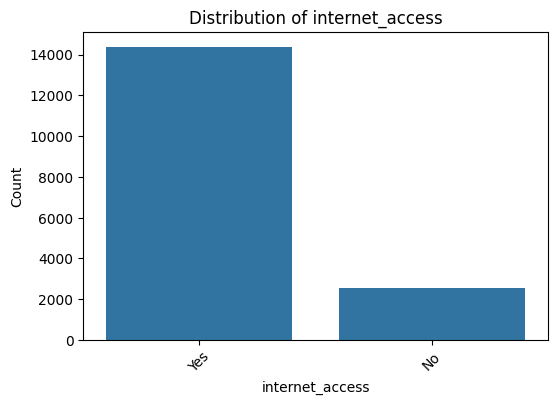

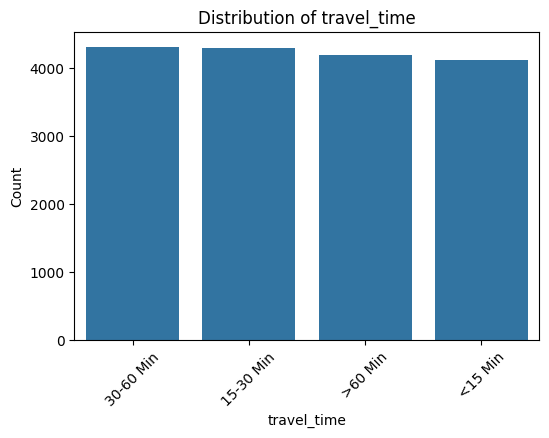

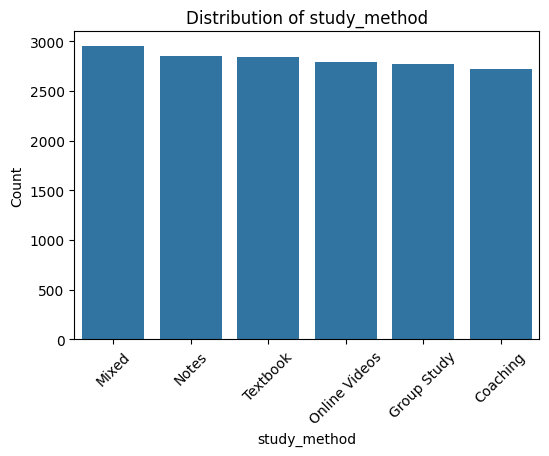

In [ ]:
categorical_colshist = ['gender', 'school_type', 'parent_education', 'internet_access', 'travel_time', 'study_method']

for col in categorical_colshist:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

**INSIGHTS:**
- Majority of students have internet access.
- Small number of NO variations


---


- Most students have grades C, D, or E.
- Fewer students achieved grade F ,B or A.

## **Bivariate Analysis**

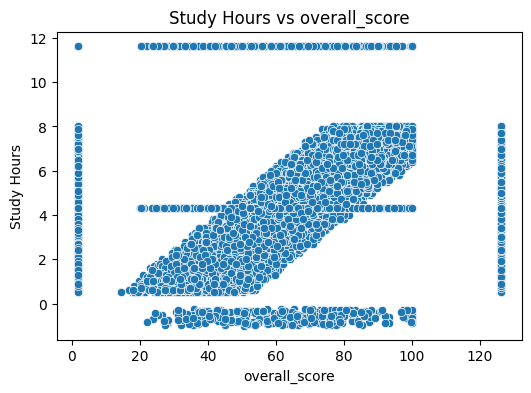

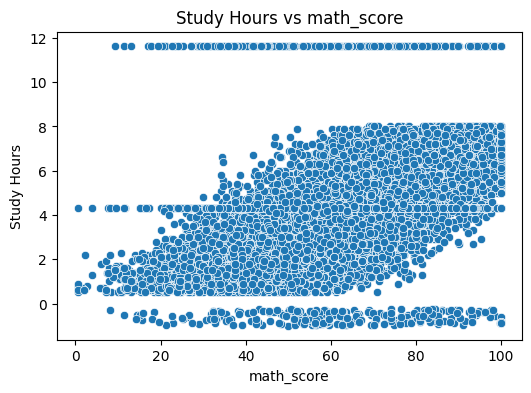

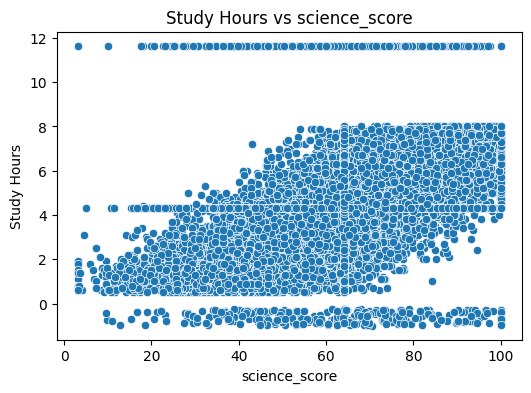

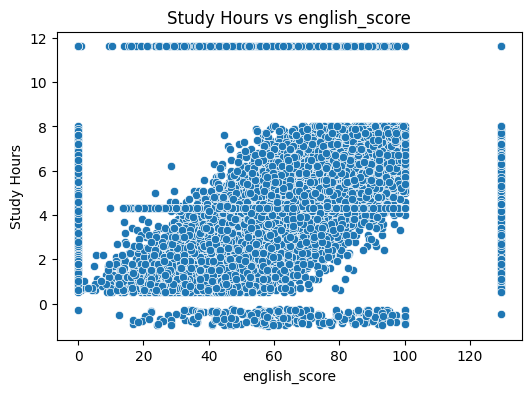

In [ ]:
for col in ['overall_score', 'math_score', 'science_score', 'english_score']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='study_hours', data=data)
    plt.title(f"Study Hours vs {col}")
    plt.xlabel(col)
    plt.ylabel("Study Hours")
    plt.show()

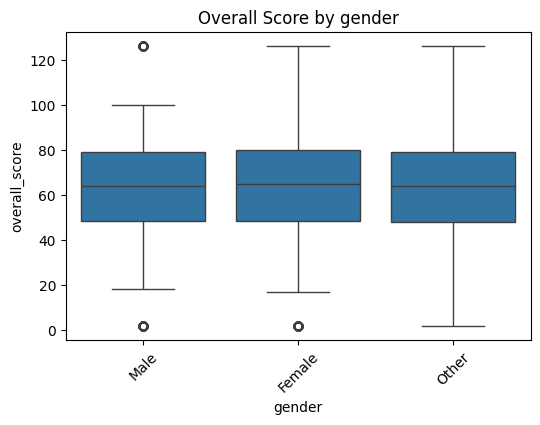

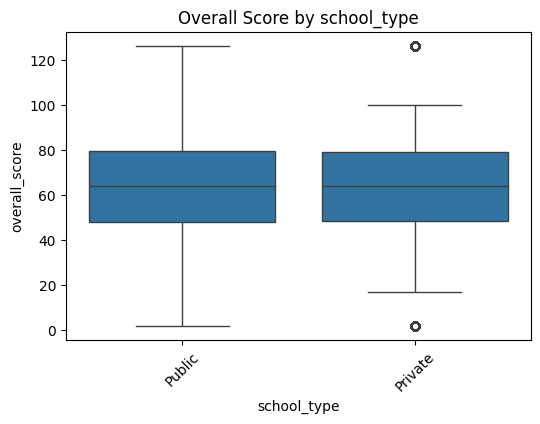

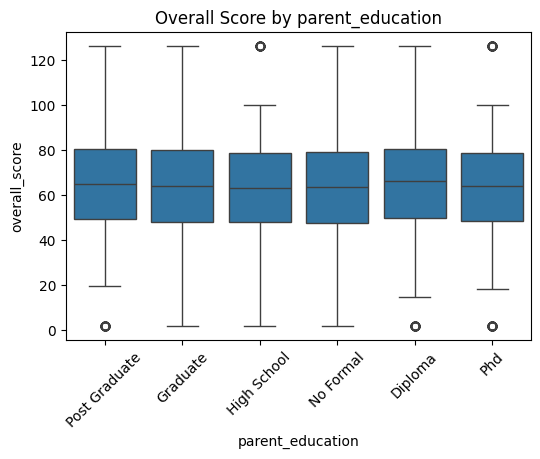

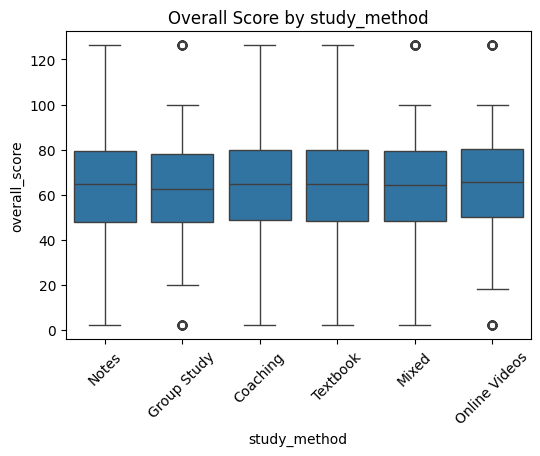

In [ ]:
# Categorical vs Numeric (Boxplots)
for cat_col in ['gender', 'school_type', 'parent_education', 'study_method']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cat_col, y='overall_score', data=data)
    plt.title(f"Overall Score by {cat_col}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
pearson_correlation = data.corr(numeric_only=True,method='pearson')
pearson_correlation

,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
age,1.000000,0.000075,0.005558,-0.003752,0.007186,0.005692,-0.002519
study_hours,0.000075,1.000000,-0.003776,0.679549,0.666063,0.590330,0.653870
attendance_percentage,0.005558,-0.003776,1.000000,0.255507,0.246875,0.216286,0.247331
math_score,-0.003752,0.679549,0.255507,1.000000,0.767437,0.679664,0.752224
science_score,0.007186,0.666063,0.246875,0.767437,1.000000,0.661135,0.735499
english_score,0.005692,0.590330,0.216286,0.679664,0.661135,1.000000,0.647253
overall_score,-0.002519,0.653870,0.247331,0.752224,0.735499,0.647253,1.000000


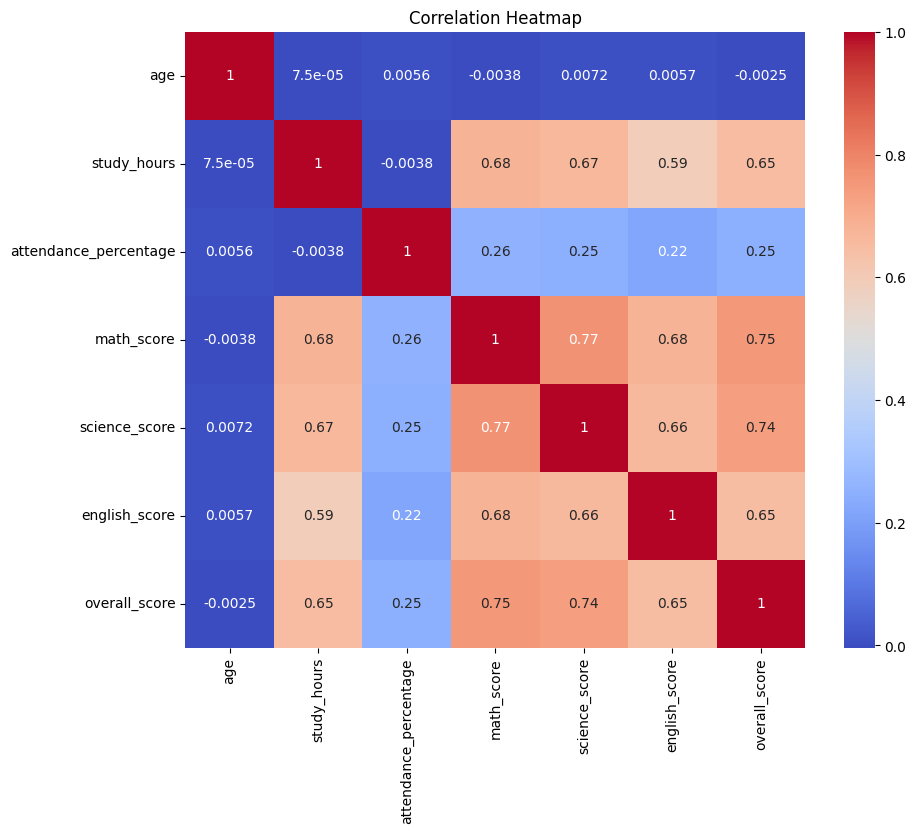

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson_correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **PART 8: FEATURE ENCODING**

In [ ]:
data.head()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,study_method,math_score,science_score,english_score,overall_score,final_grade
0,14,Male,Public,Post Graduate,3.1,84.3,Yes,<15 Min,Notes,42.7,55.4,57.0,53.1,E
1,18,Female,Public,Graduate,3.7,87.8,Yes,>60 Min,Notes,57.6,68.8,64.8,61.3,D
2,17,Female,Private,Post Graduate,7.9,65.5,No,<15 Min,Notes,84.8,95.0,79.2,89.6,B
3,16,Other,Public,Post Graduate,1.1,58.1,No,15-30 Min,Notes,44.4,27.5,54.7,41.6,E
4,16,Female,Public,High School,1.3,61.0,Yes,30-60 Min,Group Study,8.9,32.7,30.0,25.4,F


In [ ]:
nominal_cols = ['gender', 'school_type', 'internet_access', 'study_method']

data = pd.get_dummies(data, columns=nominal_cols, drop_first=True, dtype=int)
data.head()

data.head()

,age,parent_education,study_hours,attendance_percentage,travel_time,math_score,science_score,english_score,overall_score,final_grade,gender_Male,gender_Other,school_type_Public,internet_access_Yes,study_method_Group Study,study_method_Mixed,study_method_Notes,study_method_Online Videos,study_method_Textbook
0,14,Post Graduate,3.1,84.3,<15 Min,42.7,55.4,57.0,53.1,E,1,0,1,1,0,0,1,0,0
1,18,Graduate,3.7,87.8,>60 Min,57.6,68.8,64.8,61.3,D,0,0,1,1,0,0,1,0,0
2,17,Post Graduate,7.9,65.5,<15 Min,84.8,95.0,79.2,89.6,B,0,0,0,0,0,0,1,0,0
3,16,Post Graduate,1.1,58.1,15-30 Min,44.4,27.5,54.7,41.6,E,0,1,1,0,0,0,1,0,0
4,16,High School,1.3,61.0,30-60 Min,8.9,32.7,30.0,25.4,F,0,0,1,1,1,0,0,0,0


**Ordinal Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['parent_education', 'travel_time', 'final_grade']

ordinal_categories = [
    ['No Formal', 'High School', 'Diploma', 'Graduate', 'Post Graduate', 'Phd'],  # parent_education
    ['<15 Min', '15-30 Min', '30-60 Min', '>60 Min'],  # travel_time
    ['F', 'E', 'D', 'C', 'B', 'A']  # final_grade
]


encoder = OrdinalEncoder(categories=ordinal_categories)

data[ordinal_cols] = encoder.fit_transform(data[ordinal_cols])


The `travel_time_ordinal` feature converts students’ travel time to school into ordered numeric values:

In [ ]:
data.head()

,age,parent_education,study_hours,attendance_percentage,travel_time,math_score,science_score,english_score,overall_score,final_grade,gender_Male,gender_Other,school_type_Public,internet_access_Yes,study_method_Group Study,study_method_Mixed,study_method_Notes,study_method_Online Videos,study_method_Textbook
0,14,4.0,3.1,84.3,0.0,42.7,55.4,57.0,53.1,1.0,1,0,1,1,0,0,1,0,0
1,18,3.0,3.7,87.8,3.0,57.6,68.8,64.8,61.3,2.0,0,0,1,1,0,0,1,0,0
2,17,4.0,7.9,65.5,0.0,84.8,95.0,79.2,89.6,4.0,0,0,0,0,0,0,1,0,0
3,16,4.0,1.1,58.1,1.0,44.4,27.5,54.7,41.6,1.0,0,1,1,0,0,0,1,0,0
4,16,1.0,1.3,61.0,2.0,8.9,32.7,30.0,25.4,0.0,0,0,1,1,1,0,0,0,0


# **PART 9: TRAIN AND TEST AND FEATURE SCALING (STANDARDIZATION)**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['overall_score'])
Y = data['overall_score']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train.head()

,age,parent_education,study_hours,attendance_percentage,travel_time,math_score,science_score,english_score,final_grade,gender_Male,gender_Other,school_type_Public,internet_access_Yes,study_method_Group Study,study_method_Mixed,study_method_Notes,study_method_Online Videos,study_method_Textbook
0,-0.873673,-0.878947,-0.299181,1.455138,-1.357442,-0.006517,0.301633,-0.696811,-0.113075,-0.706128,-0.709182,1.019754,0.423804,-0.441836,-0.454541,-0.449924,-0.449924,2.219089
1,0.890995,1.475860,0.635204,-1.481085,1.347924,1.084951,0.008833,1.111255,0.634631,-0.706128,1.410075,-0.980629,0.423804,-0.441836,-0.454541,2.222597,-0.449924,-0.450635
2,1.479217,1.475860,-1.276040,0.297387,1.347924,-0.571399,-0.318127,-1.598716,-0.860781,-0.706128,-0.709182,-0.980629,0.423804,-0.441836,-0.454541,-0.449924,-0.449924,-0.450635
3,-0.873673,-0.878947,1.272286,-1.209083,0.446135,1.070589,1.614354,1.247392,0.634631,-0.706128,-0.709182,1.019754,0.423804,-0.441836,-0.454541,-0.449924,2.222597,-0.450635
4,0.890995,-0.878947,1.229814,-0.162923,-0.455653,1.424837,1.765634,1.545191,2.130044,1.416173,-0.709182,-0.980629,0.423804,-0.441836,-0.454541,-0.449924,-0.449924,-0.450635


**Each numeric feature now has mean ~0 and std ~1**

# **LINEAR REGRESSION**

In [ ]:
# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = lr_model.predict(X_test)
Y_test_np = Y_test.to_numpy()
np.set_printoptions(precision=2)

# Concatenate predicted and actual values
comparison = np.concatenate((Y_pred.reshape(-1,1), Y_test_np.reshape(-1,1)), axis=1)
print(comparison[:20])


[[ 30.85  26.7 ]
 [ 61.08  56.6 ]
 [ 88.71  89.2 ]
 [ 45.63  49.  ]
 [ 49.82  52.8 ]
 [ 51.46  52.1 ]
 [ 52.47  54.  ]
 [ 75.02  81.3 ]
 [ 62.96  69.6 ]
 [ 88.    94.  ]
 [ 87.05  87.8 ]
 [100.35  96.1 ]
 [ 86.66  87.8 ]
 [ 36.79  34.2 ]
 [ 64.03  66.9 ]
 [ 60.7   66.4 ]
 [ 47.21  44.3 ]
 [ 92.99  93.4 ]
 [ 30.31  25.  ]
 [ 66.25  66.6 ]]


In [ ]:
mse = mean_squared_error(Y_test, Y_pred)    # Main metric
rmse = np.sqrt(mse)                          # Root MSE
r2 = r2_score(Y_test, Y_pred)                # R²

print("Linear Regression Performance (MSE-focused):")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

Linear Regression Performance (MSE-focused):
MSE: 131.306
RMSE: 11.459
R²: 0.721


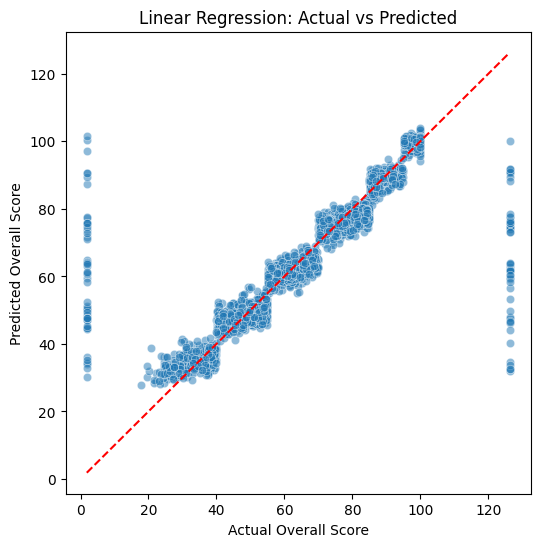

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Overall Score')
plt.ylabel('Predicted Overall Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate using
mse = mean_squared_error(Y_test, Y_pred_rf)          # Main metric
rmse = np.sqrt(mse)                                  # Root MSE
r2 = r2_score(Y_test, Y_pred_rf)                     # R²

print("Random Forest Regressor Performance (MSE-focused):")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

Random Forest Regressor Performance (MSE-focused):
MSE: 155.577
RMSE: 12.473
R²: 0.669


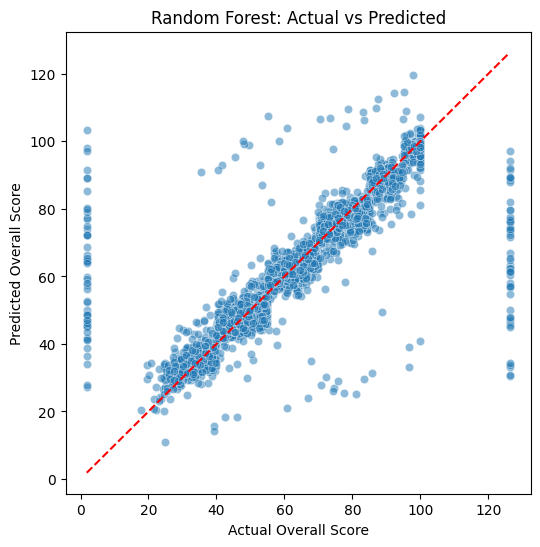

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=Y_test, y=Y_pred_rf, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Overall Score')
plt.ylabel('Predicted Overall Score')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [ ]:
# Predict on train
Y_train_pred = lr_model.predict(X_train)

# Evaluate
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_train_pred)

mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_pred)

print("Train Performance:")
print(f"MSE: {mse_train:.3f}, RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")

print("Test Performance:")
print(f"MSE: {mse_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")


Train Performance:
MSE: 143.221, RMSE: 11.967, R²: 0.694
Test Performance:
MSE: 131.306, RMSE: 11.459, R²: 0.721


[dataset](https://www.kaggle.com/datasets/kundanbedmutha/student-performance-dataset?utm_source=chatgpt.com)